In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/layel/Downloads/Africa_climate_change.csv")
df.head()


,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon


In [2]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464815 entries, 0 to 464814
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   DATE     464815 non-null  object 
 1   PRCP     177575 non-null  float64
 2   TAVG     458439 non-null  float64
 3   TMAX     363901 non-null  float64
 4   TMIN     332757 non-null  float64
 5   COUNTRY  464815 non-null  object 
dtypes: float64(4), object(2)
memory usage: 21.3+ MB


DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64

In [5]:
df.columns
df.head()



,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
2,19800101 000000,0.0,72.0,86.0,59.0,Cameroon
6,19800101 000000,0.0,76.0,97.0,59.0,Senegal
7,19800101 000000,0.0,74.0,95.0,59.0,Senegal
8,19800101 000000,0.0,78.0,93.0,63.0,Senegal
9,19800101 000000,0.0,76.0,91.0,59.0,Senegal


In [6]:
import pandas as pd

# Convert DATE column to datetime
df["DATE"] = pd.to_datetime(df["DATE"], format="%Y%m%d %H%M%S", errors="coerce")

# Extract Year
df["Year"] = df["DATE"].dt.year

df.head()


,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY,Year
2,1980-01-01,0.0,72.0,86.0,59.0,Cameroon,1980
6,1980-01-01,0.0,76.0,97.0,59.0,Senegal,1980
7,1980-01-01,0.0,74.0,95.0,59.0,Senegal,1980
8,1980-01-01,0.0,78.0,93.0,63.0,Senegal,1980
9,1980-01-01,0.0,76.0,91.0,59.0,Senegal,1980


In [7]:
# Drop rows with missing values
df = df.dropna(subset=["TAVG", "COUNTRY", "Year"])


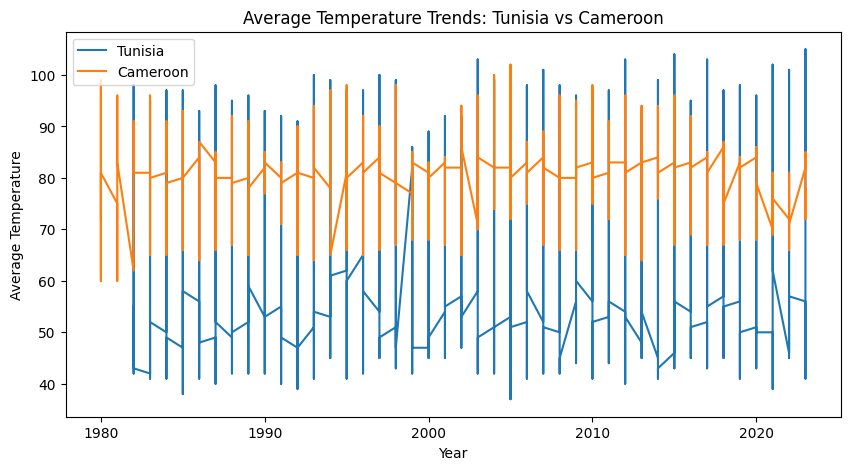

In [8]:
import matplotlib.pyplot as plt

tunisia = df[df["COUNTRY"] == "Tunisia"]
cameroon = df[df["COUNTRY"] == "Cameroon"]

plt.figure(figsize=(10,5))
plt.plot(tunisia["Year"], tunisia["TAVG"], label="Tunisia")
plt.plot(cameroon["Year"], cameroon["TAVG"], label="Cameroon")

plt.xlabel("Year")
plt.ylabel("Average Temperature")
plt.title("Average Temperature Trends: Tunisia vs Cameroon")
plt.legend()
plt.show()


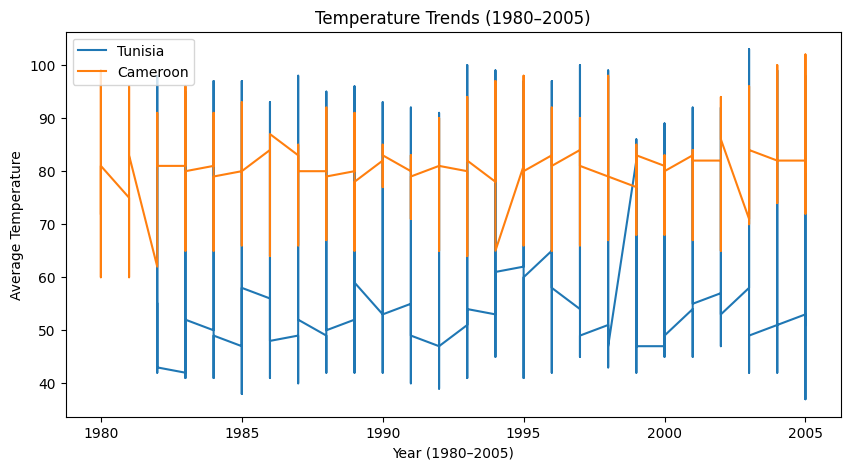

In [9]:
zoom = df[(df["Year"] >= 1980) & (df["Year"] <= 2005)]

tunisia_z = zoom[zoom["COUNTRY"] == "Tunisia"]
cameroon_z = zoom[zoom["COUNTRY"] == "Cameroon"]

plt.figure(figsize=(10,5))
plt.plot(tunisia_z["Year"], tunisia_z["TAVG"], label="Tunisia")
plt.plot(cameroon_z["Year"], cameroon_z["TAVG"], label="Cameroon")

plt.xlabel("Year (1980–2005)")
plt.ylabel("Average Temperature")
plt.title("Temperature Trends (1980–2005)")
plt.legend()
plt.show()


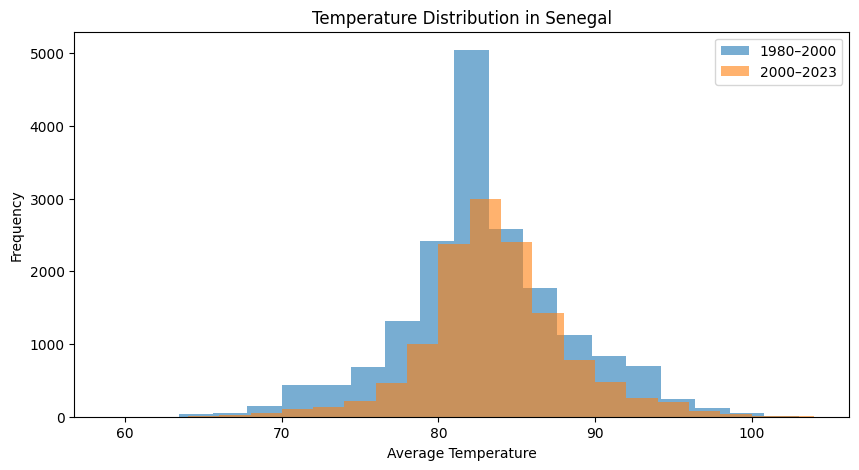

In [10]:
senegal = df[df["COUNTRY"] == "Senegal"]

before_2000 = senegal[(senegal["Year"] >= 1980) & (senegal["Year"] < 2000)]
after_2000 = senegal[(senegal["Year"] >= 2000) & (senegal["Year"] <= 2023)]

plt.figure(figsize=(10,5))
plt.hist(before_2000["TAVG"], bins=20, alpha=0.6, label="1980–2000")
plt.hist(after_2000["TAVG"], bins=20, alpha=0.6, label="2000–2023")

plt.xlabel("Average Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution in Senegal")
plt.legend()
plt.show()


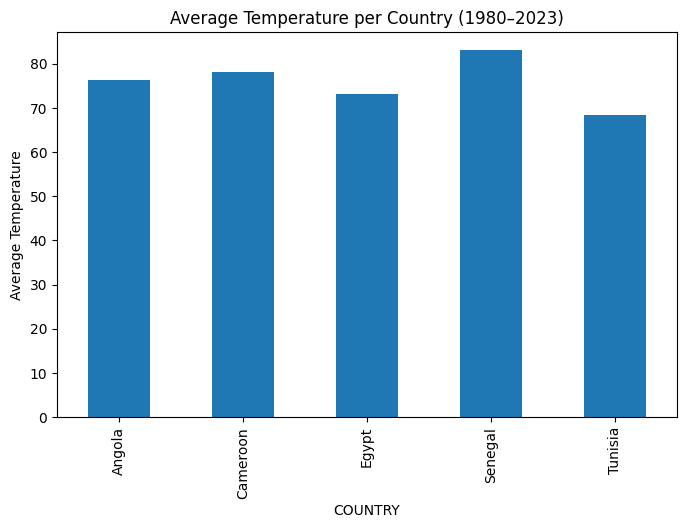

In [11]:
avg_country = df.groupby("COUNTRY")["TAVG"].mean()

avg_country.plot(kind="bar", figsize=(8,5))
plt.ylabel("Average Temperature")
plt.title("Average Temperature per Country (1980–2023)")
plt.show()


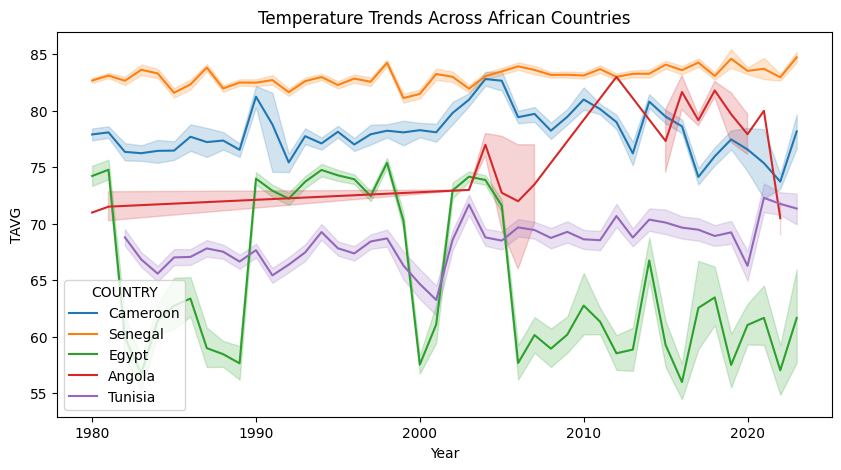

In [12]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="TAVG", hue="COUNTRY")
plt.title("Temperature Trends Across African Countries")
plt.show()
